In [1]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,sklearn,keras

Using TensorFlow backend.


CPython 3.5.2
IPython 6.2.1

numpy 1.13.3
scipy 0.19.1
pandas 0.20.3
matplotlib 2.1.0
sklearn 0.19.0
keras 2.0.8

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.9.60-linuxkit-aufs
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           1980         393         235           1        1351        1393
Swap:          1023           0        1023


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from ipywidgets import Image
from io import StringIO
import pydotplus 
from sklearn.tree import export_graphviz

In [4]:
import time
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(100)):
    time.sleep(0.05)

HBox(children=(IntProgress(value=0), HTML(value='')))

In [5]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
pd.DataFrame(X, columns=cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
import xgboost, lightgbm

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xgb = xgboost.XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)
prediction = xgb.predict_proba(X_test)

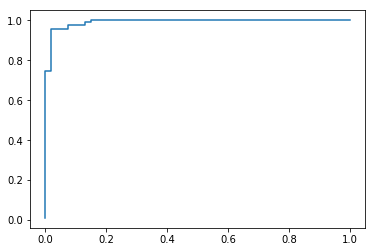

In [8]:
fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
plt.plot(fpr, tpr);

In [9]:
import fbprophet

In [10]:
!vw --version

8.4.0


In [11]:
import keras

In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [13]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

In [14]:
dot_data = StringIO()
export_graphviz(tree, feature_names=cancer.feature_names, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xb1\x00\x00\x01\xf1\x08\x02\x00\x00\x00\xdc3f\x08\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddu\\Ti\x17\x07\xf03\x0c\xdd\x1d"\x08"\x82\xb8\xa8(\x08\x8a\x80\xad\xd8\x8dbw\x17\xc6\xae\xd8\xae\xba\x8a\xdd\xbd\xea\xda\x08\x06*\x18(\x82\x82(&\x8a\xb0\x06\x16\rC\x83\xd40\xef\x1fw\xdf\xd9Yr\xc8!~\xdf\xcf\xfe1s\xees\x9f{\xee\xcc\xbc\xaf3\x87\'X<\x1e\x8f\x00\x00\x00\x00\x00\x00\x00\x00\x1a\x191Q\'\x00\x00\x00\x00\x00\x00\x00\x00 \x02\xa8\x89\x00\x00\x00\x00\x00\x00\x00@c\x84\x9a\x08\x00\x00\x00\x00\x00\x00\x004F\xe2\xa2N\x00\x00\x00\xa0\xb6\xe5\xe4\xe4x{{s\xb9\\Q\'\x02P{\xb4\xb5\xb5\xed\xec\xecD\x9d\x05\x00\x00@\xdd\x82\x9a\x08\x00\x004:\xde\xde\xde\xc3\x87\x0f\x17u\x16\x00\xb5J\\\\<??_\xd4Y\x00\x00\x00\xd4-\xa8\x89\x00\x00@\xa3SPP@DW\xc33E\x9d\x08@-\t\xf4\xb9\xb2\xdde\x82\xa8\xb3\x00\x00\x00\xa8s\xb0\x9e\x08\x00\x00\x00\x00\x00\x00\x004F\xa8\x89\x00\x00\x00\x00\x00\x00\x00@c\x84\x9a\x08\x00\x00\x00\x00\x00\x00\x004F\xa8\x89\x00\x00\x00\x00\x00\x00\x00@c\x84\x9a\x08\x00\x00\x00\x00\x00\x00\x004F\xd8w\x06\x00\x00\x00J6\xb4\x95<\xf3\xa0\x91\xec\xd1\xc3+,\xf4\xbb~\xfe\xfc\x9e\r\x9c\xf8\x98\xd2n9#5\xd9\xe3\xc8\xb6\x10?\xef\xa4\xd8(iY\xb9_:\xda9:\xcf4\xb7\xb6/\xa3\xdb\xd8\xef\x917N\xef\x0f{\xf6().\x8a\x88\xd4\xb5\x9b\xfebm?p\xc2<m}\xc3\n]\x9d\xffv\x08j$o\r\x00\x00@\r\xc18\x11\x00\x00\x00(Y\x89\xbf\xb7]\xc7\xf5r\x1d\xd7\xab\xf6\x93\xa9i\xaf\x03\xef\xbb\x0c\xeb|\xdf\xf3/N|Limb\xbe~Z8\xa8\xe3\xf7\x8f\xef\x97\xed>s.$\xe6\x8fs\xbe\xe9)\x9c5\x93\xfa\x95\xd1\xed\xab\xc7\xbe\x0b\x07Z\xbd\xf0\xbf3v\xf1\xba#\xf7\xc3\x8f\xdc\x0f\x1f\xe7\xb2>\xc4\xcfg\xc1 \xab7A\x0f*tu\x00\x00\x00\xa8v\x18\'\x02\x00\x00P\x0f0c\x04\xea\xc2\xa0\x00^a\xa1\xa8S\xa8\x11\xc77-\x1d\xbfd\x83u\x8f\x81%\x0e\xc7 ".\xb7\xc0m\xe1XyE\xe5\x95\x87.\x8bKH\x12\x91n\xf3\x96s7\x1e\x9c\xd3\xa7M\x19\xdd\x9e\xda\xba"?/w\xc1\x96\xa3\xad-m\x99\x88U\xb7~\xb2\xf2\x8a\xab&\xf4\xfds\xcbo{\xbc\x9e\tyuF]\xf8\x00\x00\x00\x004$\xa8\x89\x00\x00\x00@\x05\xfcq\xfe\xbeh\x13H\x8c\xfd\xf1\xe8\xd6\xe5\x80\x1b\x97v_\x7fZ\x8d\xdd\xee\xb9\x11\xc2f\x97\xf5\xbd\xe8\xe9\xbd\x1b\xdf>\x84\xcdZ\xbb\x9b)\x880t\xf4\x9b\x97]\xa7\x88\x8b\xfaJDFf\xed\x04\x83F\xad-\x88(\xfe\xc7W\xe1\xaf\x0e\x00\x00\x005\x01\xff\xfa\x02\x00\x00@=\x90\x99\x96\x12x\xfbJ\xc0\x8dK\xe1/\x9f\xb0\xc4\xc4\xcc\xad\x1d\xaa\xb7\xffrK\x12O\xee^#\xa2V\xff\x1f\xee!$\xa3\xd6\xed\xc2_<\xf9\xfc\xfeuk\x81\x13?\x87\xbdb\x0e\t\x7fu\x00\x00\x00\xa8\t\xf8\x07\x18\x00\x00\xa0\x04\x82S\x18V\x1e\xbal\xd9\xd5\x91\x88|\xce\x1f=\xfa\xbb\xcb\xde\x9b\xcf\xf5\x8cL\x89\xc8\xdf\xeb\xe2\xee_\xa71m\x98\xc1\x02\xa9I\xf1\x17\xf6mz\xe1\x7f;\x95\x93\xa8\xac\xa6a\xd9\xd5q\xf4\xfc\x95\xcaj\x9aE\xfa<t\xe7\xed\xe9m+\xdf>\xf5\xcf\xcaHc\xce\xcd\xceH\xbf\xb8\x7f\xd3\xb3\x07\xb7\x92\x13b\xa5ddu\r[\x9aZX\xdb\xf6\x1df\xdc\xc6R\xf0D\xe6A\xcf\xe1\x13\xe7n<Pv\xda\xc5/ADo\x9e\xf8\xdd:s\xe8\xfd\xf3\xc0\xbc\xdc\x1c=#\xd3\xa1\xd3\x16w\xe97B\xf0\xf4\xef\x9f\xc2Oo[\xf9>$P\x8c-fn\xddu\xeaJ\xb7\xd2\xfa\xe7\x0f\x8e\x10&R\xf6\xdd\x95-/\xe7\xe73?\xef\x80\x1b\x97^>\xba\xc7-\xc87jm1\xf9\xb7-v\xfdF(\xabk\x95\x98X\x19\xaa8\xf1\xe4\xf3\xfb\xd7D$..\xb1\x7f\xd5\x9c\x17\x0fog\xa4\xa5\xa8j\xeaX:\xf4q\x9a\xeb\xaa\xa4\xa6Q\xdaY\xb3\xd6\xee\xd9<g\xd4\xde\xdffL[\xb9\xcd\xcc\xd2\x96\x88\xc2_\x04\x1d\xdb\xb8TK\xcfp\xd6\xfa\xbd\x15\xcd\xe1\xdc\xee\xf5\x017\xdd\x93\x13b\x95\xd44:\xd8\xf7\x19=\xcfUEC\xbb*7\x05\x00\x00\xd0\xc8\xa1&\x02\x00\x00P\x82\xab\xe1\x99\x7f\xcc\x1b\xfd\xec\xfe\xcd)+\xb62\x05\x11"zp\xed\x1c\x11=\xbc~a\xbc\xcbz"r\x184\x9a\x88\x1ey{\xac:\xecAD\xa9I\xf1\xcbF:\x14\x16r\x17m=\xde\xc2\xbc\xc3\xc7\xb7\xcfw-\x9b\xfa\xf2\xd1=7\xf7\x87LY\xe4jx&\xf3\xd3\xfd\xf0\xfa\x85\xa3\xe7\xad\\\xbc\xed\xc4\xbbg\x8f~\x9f9\x8c\x88\xf6\xac\x98\xf1\xec\xfe\xcd\xa9+\xdcz\x8e\x9c(..\x11\x1f\xf5\xed\xec\xce\xb5\xcb\x9d\xba2?\xe3\xf9\'\x96\xfb\xab\xbe\x8cK\x10\xd1\xba)\x03\xad{\x0c<x\'47\'\xfb\xc0\xaa\xb9;\x96L\x92ST\xb6\xe8\xd2\x939\x1a\xf7\xfd\x8b\xabsO)\x19Y\xd7\x83\xee-\xcc;D\x86\xbf9\xb4f~i\xfdW(R\xf6\xdd\x95\xa8\x90\x